In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


In [3]:
import requests

url = "https://api.massive.com/v2/aggs/ticker/AAPL/range/1/day/2025-11-11/2026-02-11?adjusted=true&sort=asc&limit=120&apiKey=3LurkcZycmdHfWOFx4eQG4ZF_sReGawo"   # Daha önce bulduğunuz URL ile değiştirin
api_data = requests.get(url).json()
api_data

{'ticker': 'AAPL',
 'queryCount': 63,
 'resultsCount': 63,
 'adjusted': True,
 'results': [{'v': 46208318.0,
   'vw': 274.0647,
   'o': 269.81,
   'c': 275.25,
   'h': 275.91,
   'l': 269.8,
   't': 1762837200000,
   'n': 702875},
  {'v': 48397982.0,
   'vw': 273.8707,
   'o': 275,
   'c': 273.47,
   'h': 275.73,
   'l': 271.7,
   't': 1762923600000,
   'n': 591930},
  {'v': 49602794.0,
   'vw': 273.3661,
   'o': 274.11,
   'c': 272.95,
   'h': 276.699,
   'l': 272.09,
   't': 1763010000000,
   'n': 684410},
  {'v': 47431331.0,
   'vw': 273.1083,
   'o': 271.05,
   'c': 272.41,
   'h': 275.96,
   'l': 269.6,
   't': 1763096400000,
   'n': 705592},
  {'v': 45018260.0,
   'vw': 267.9841,
   'o': 268.815,
   'c': 267.46,
   'h': 270.49,
   'l': 265.73,
   't': 1763355600000,
   'n': 705791},
  {'v': 45677278.0,
   'vw': 267.725,
   'o': 269.99,
   'c': 267.44,
   'h': 270.71,
   'l': 265.32,
   't': 1763442000000,
   'n': 706583},
  {'v': 40424492.0,
   'vw': 269.3251,
   'o': 265.525,
  

In [4]:
apple_df = pd.DataFrame(api_data['results'])
apple_df.head()

,v,vw,o,c,h,l,t,n
0,46208318.0,274.0647,269.810,275.25,275.910,269.80,1762837200000,702875
1,48397982.0,273.8707,275.000,273.47,275.730,271.70,1762923600000,591930
2,49602794.0,273.3661,274.110,272.95,276.699,272.09,1763010000000,684410
3,47431331.0,273.1083,271.050,272.41,275.960,269.60,1763096400000,705592
4,45018260.0,267.9841,268.815,267.46,270.490,265.73,1763355600000,705791


In [5]:
apple_df["date"] = pd.to_datetime(apple_df["t"], unit="ms")
apple_df.set_index("date", inplace=True)
apple_df.head()

,v,vw,o,c,h,l,t,n
date,,,,,,,,
2025-11-11 05:00:00,46208318.0,274.0647,269.810,275.25,275.910,269.80,1762837200000,702875
2025-11-12 05:00:00,48397982.0,273.8707,275.000,273.47,275.730,271.70,1762923600000,591930
2025-11-13 05:00:00,49602794.0,273.3661,274.110,272.95,276.699,272.09,1763010000000,684410
2025-11-14 05:00:00,47431331.0,273.1083,271.050,272.41,275.960,269.60,1763096400000,705592
2025-11-17 05:00:00,45018260.0,267.9841,268.815,267.46,270.490,265.73,1763355600000,705791


In [12]:
apple_df = apple_df.rename(columns={
    "o" : "open",
    "h" : "high",
    "l" : "low",
    "c" : "close",
    "v" : "volume",
    "n" : "transactions",
    "vw" : "volume_weighted_price"
    })
apple_df = apple_df.drop(columns=["t"])
apple_df.head()

,volume,volume_weighted_price,open,close,high,low,transactions
date,,,,,,,
2025-11-11 05:00:00,46208318.0,274.0647,269.810,275.25,275.910,269.80,702875
2025-11-12 05:00:00,48397982.0,273.8707,275.000,273.47,275.730,271.70,591930
2025-11-13 05:00:00,49602794.0,273.3661,274.110,272.95,276.699,272.09,684410
2025-11-14 05:00:00,47431331.0,273.1083,271.050,272.41,275.960,269.60,705592
2025-11-17 05:00:00,45018260.0,267.9841,268.815,267.46,270.490,265.73,705791


<Axes: xlabel='date'>

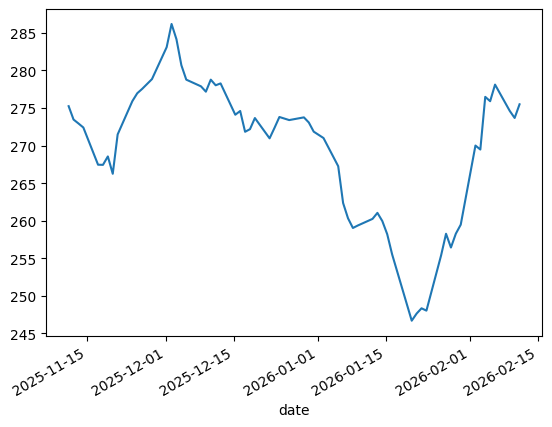

In [14]:
apple_df["close"].plot()

<Axes: xlabel='date'>

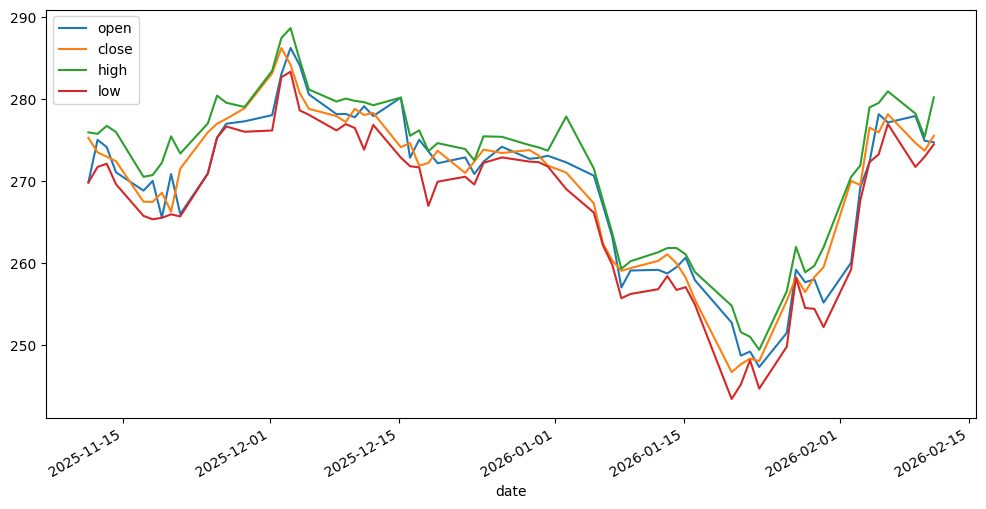

In [17]:
apple_df[["open", "close", "high", "low"]].plot(figsize=(12,6))

In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/elifcubukcu/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /Users/elifcubukcu/data-stock-market/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.55s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master

